In [1]:
import numpy as np

ПУНКТ a

In [28]:
np.random.seed(100)

def γ_coefficient(x):
    n = len(x)
    mean = np.mean(x)
    m2 = np.sum((x - mean)**2) / n
    m3 = np.sum((x - mean)**3) / n
    
    if m2 > 0:
        skewness = m3 / (m2 ** 1.5)
    else:
        skewness = 0
    
    return skewness

def find_mode(x):
    unique, counts = np.unique(x, return_counts=True)
    max_count = np.max(counts)
    
    if max_count == 1:
        return None, "Все элементы уникальны (встречаются по одному разу)"
    else:
        modes = unique[counts == max_count]
        if len(modes) == 1:
            return modes[0], f"Мода = {modes[0]} (встречается {max_count} раз)"
        else:
            return modes, f"Несколько мод: {list(modes)} (встречаются по {max_count} раз)"


In [29]:
n = 25
sample = np.random.exponential(scale=1, size=n)

sorted_sample = np.sort(sample)

if n % 2 == 1:
    median = sorted_sample[n // 2]
else:
    median = (sorted_sample[n // 2 - 1] + sorted_sample[n // 2]) / 2

range_val = np.max(sample) - np.min(sample)

γ = γ_coefficient(sample)

mode_value, mode_message = find_mode(sample)

In [30]:
print(f"Сгенерированная выборка (n={n}):")
print(np.round(sample, 4))
print()
print("Статистические характеристики:")
print(f"Мода: {mode_message}")
print(f"Медиана: {median:.4f}")
print(f"Размах: {range_val:.4f}")
print(f"Оценка коэффициента асимметрии: {γ:.4f}")

Сгенерированная выборка (n=25):
[0.784  0.3262 0.5525 1.8629 0.0047 0.1296 1.1109 1.7479 0.147  0.8559
 2.2194 0.2347 0.205  0.1147 0.2481 3.8455 1.6696 0.1887 1.694  0.3203
 0.5651 2.8139 1.7018 0.4096 0.1929]

Статистические характеристики:
Мода: Все элементы уникальны (встречаются по одному разу)
Медиана: 0.5525
Размах: 3.8407
Оценка коэффициента асимметрии: 1.2810


ПУНКТ b

In [31]:
import matplotlib.pyplot as plt

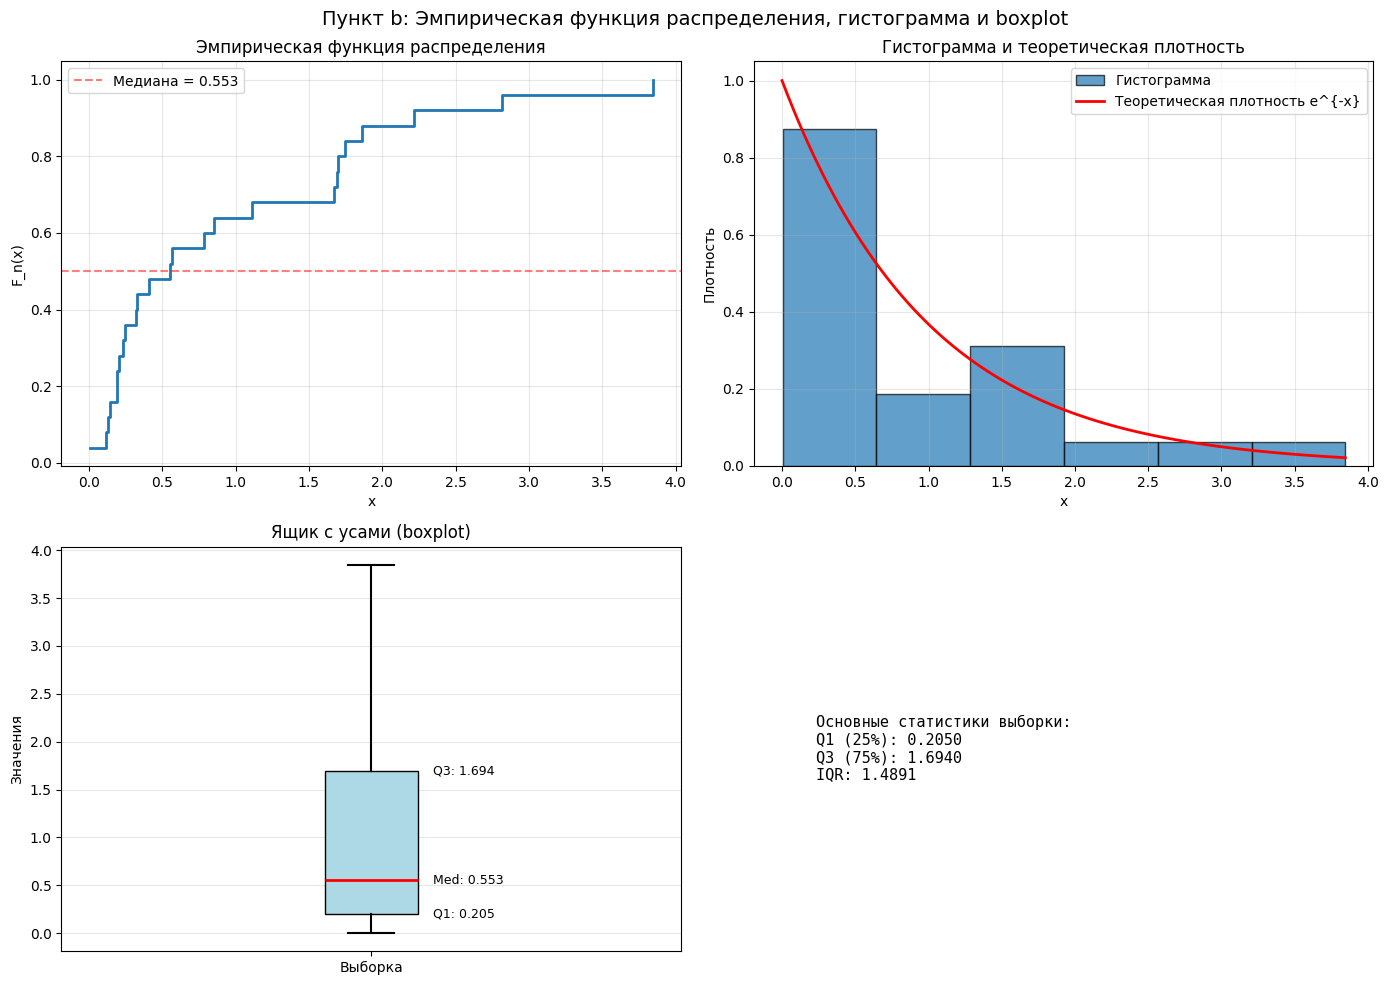

In [32]:
plt.style.use('default')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Пункт b: Эмпирическая функция распределения, гистограмма и boxplot', fontsize=14)

ax1 = axes[0, 0]
x_sorted = np.sort(sample)
y = np.arange(1, n + 1) / n

ax1.step(x_sorted, y, where='post', linewidth=2)
ax1.set_xlabel('x')
ax1.set_ylabel('F_n(x)')
ax1.set_title('Эмпирическая функция распределения')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label=f'Медиана = {median:.3f}')
ax1.legend()


ax2 = axes[0, 1]
n_bins = int(np.ceil(1 + np.log2(n)))
ax2.hist(sample, bins=n_bins, density=True, alpha=0.7, edgecolor='black', label='Гистограмма')

x_theor = np.linspace(0, np.max(sample), 100)
y_theor = np.exp(-x_theor)
ax2.plot(x_theor, y_theor, 'r-', linewidth=2, label='Теоретическая плотность e^{-x}')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность')
ax2.set_title('Гистограмма и теоретическая плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)


ax3 = axes[1, 0]
ax3.boxplot(sample, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(linewidth=1.5),
            capprops=dict(linewidth=1.5),
            flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))
ax3.set_ylabel('Значения')
ax3.set_title('Ящик с усами (boxplot)')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticks([1])
ax3.set_xticklabels(['Выборка'])


ax3.text(1.1, np.percentile(sample, 75), f'Q3: {np.percentile(sample, 75):.3f}', 
         va='center', fontsize=9)
ax3.text(1.1, median, f'Med: {median:.3f}', va='center', fontsize=9)
ax3.text(1.1, np.percentile(sample, 25), f'Q1: {np.percentile(sample, 25):.3f}', 
         va='center', fontsize=9)

ax4 = axes[1, 1]
ax4.axis('off')
stats_text = f"""
Основные статистики выборки:
Q1 (25%): {np.percentile(sample, 25):.4f}
Q3 (75%): {np.percentile(sample, 75):.4f}
IQR: {np.percentile(sample, 75) - np.percentile(sample, 25):.4f}
"""
ax4.text(0.1, 0.5, stats_text, va='center', fontsize=11, family='monospace')

plt.tight_layout()
plt.show()


ПУНКТ c

см. прикрепрленный файл pdf для ЦПТ оценки

In [33]:
def bootstrap_mean(x, N=1000):
    bootstrap_means = []
    n = len(x)
    for _ in range(N):
        bt_sample = np.random.choice(x, size=n, replace=True)
        bootstrap_means.append(np.mean(bt_sample))
    return np.array(bootstrap_means)

N = 1000

In [34]:
def norm(x, m, D):
    return 1/(np.sqrt(2*np.pi*D))*np.exp(-(x-m)**2/(2*D))

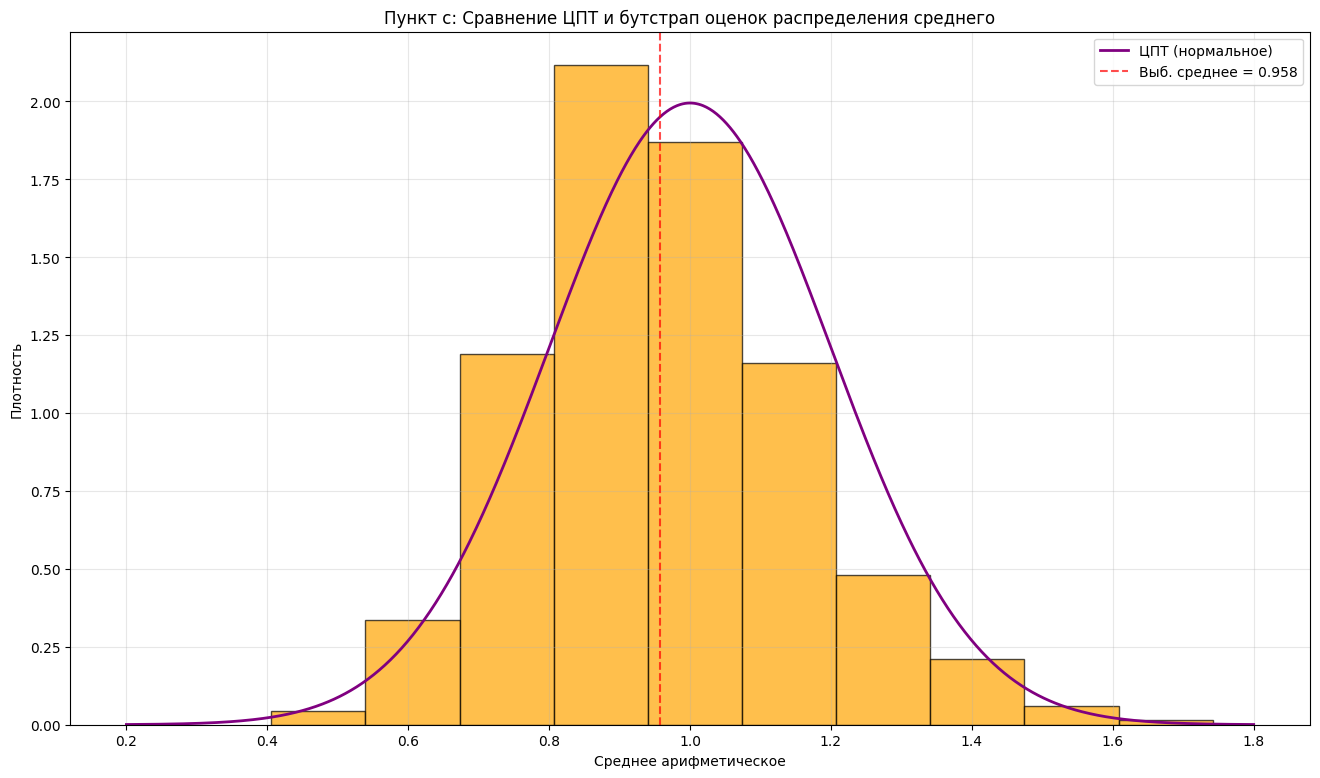

In [35]:
mξ = 1
Dξ = 1/25

bt = bootstrap_mean(sample, N)

fig, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.hist(bt, bins=int(np.log2(N))+1, color='orange', density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0.2, 1.8, 1000)
norm_x = norm(x, mξ, Dξ)
axs.plot(x, norm_x, color='purple', linewidth=2, label='ЦПТ (нормальное)')
axs.axvline(x=np.mean(sample), color='red', linestyle='--', alpha=0.7, label=f'Выб. среднее = {np.mean(sample):.3f}')
axs.set_xlabel('Среднее арифметическое')
axs.set_ylabel('Плотность')
axs.set_title('Пункт c: Сравнение ЦПТ и бутстрап оценок распределения среднего')
axs.legend()
axs.grid(True, alpha=0.3)
plt.show()

ПУНКТ d

In [36]:
def bootstrap_γ(x, N=1000):
    bootstrap_γ_vals = []
    n = len(x)
    for _ in range(N):
        bt_sample = np.random.choice(x, size=n, replace=True)
        bootstrap_γ_vals.append(γ_coefficient(bt_sample))
    return np.array(bootstrap_γ_vals)

In [37]:
bt_γ = bootstrap_γ(sample, N)

prob_γ_less_1 = np.sum(bt_γ < 1) / N

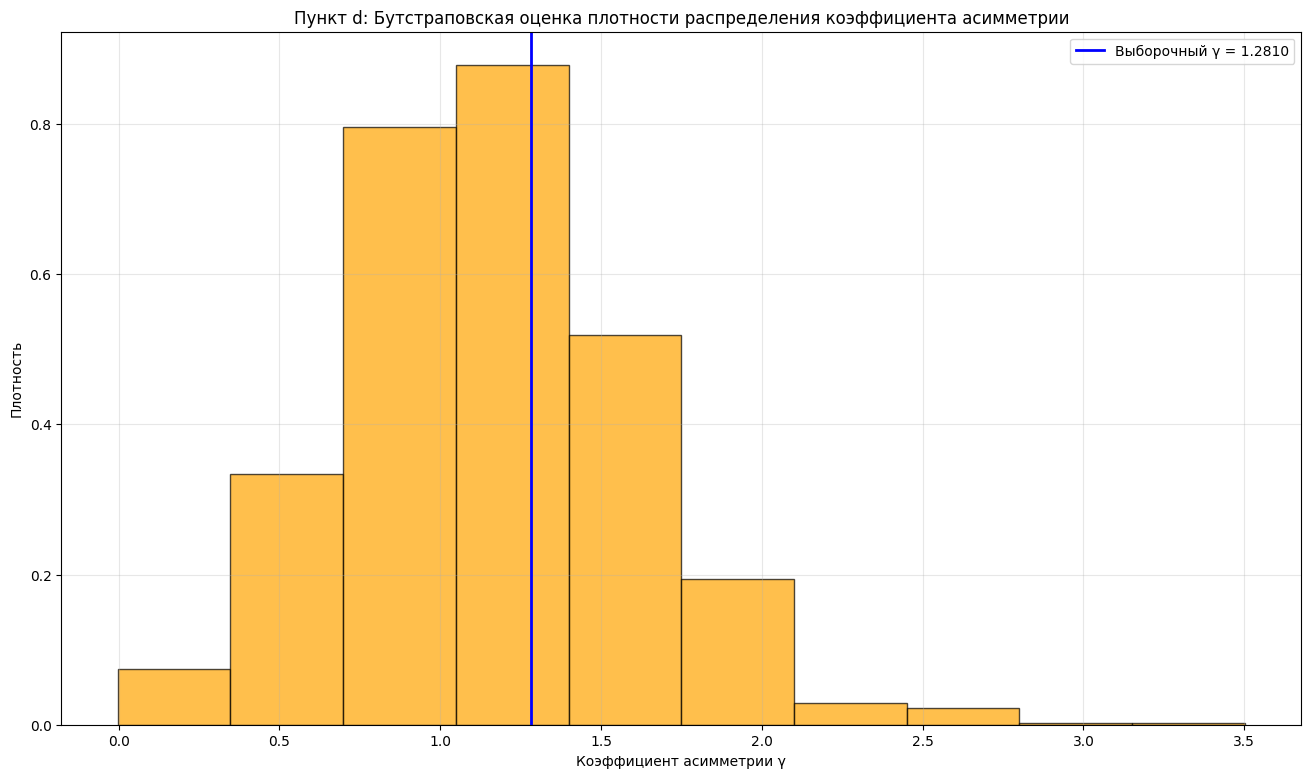


Статистики для пункта d:
Выборочный коэффициент асимметрии: 1.2810
Вероятность того, что коэффициент асимметрии меньше 1: 0.3760


In [38]:
fig, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.hist(bt_γ, bins=int(np.log2(N))+1, color='orange', density=True, alpha=0.7, edgecolor='black')
axs.axvline(x=γ, color='blue', linestyle='-', linewidth=2, label=f'Выборочный γ = {γ:.4f}')
axs.set_xlabel('Коэффициент асимметрии γ')
axs.set_ylabel('Плотность')
axs.set_title('Пункт d: Бутстраповская оценка плотности распределения коэффициента асимметрии')
axs.legend()
axs.grid(True, alpha=0.3)
plt.show()

print(f"\nСтатистики для пункта d:")
print(f"Выборочный коэффициент асимметрии: {γ:.4f}")
print(f"Вероятность того, что коэффициент асимметрии меньше 1: {prob_γ_less_1:.4f}")

ПУНКТ e

In [39]:
from math import factorial

In [40]:
def bootstrap_median(x, N=1000):
    bootstrap_medians = []
    n = len(x)
    for _ in range(N):
        bt_sample = np.random.choice(x, size=n, replace=True)
        bootstrap_medians.append(np.median(bt_sample))
    return np.array(bootstrap_medians)

In [41]:
k = n//2+1

In [42]:
def median_density(x):
    if x < 0:
        return 0
    f_x = np.exp(-x)
    F_x = 1 - np.exp(-x)
    coeff = factorial(n) / (factorial(k-1) * factorial(n-k))
    return coeff * f_x * (F_x ** (k-1)) * ((1 - F_x) ** (n-k))

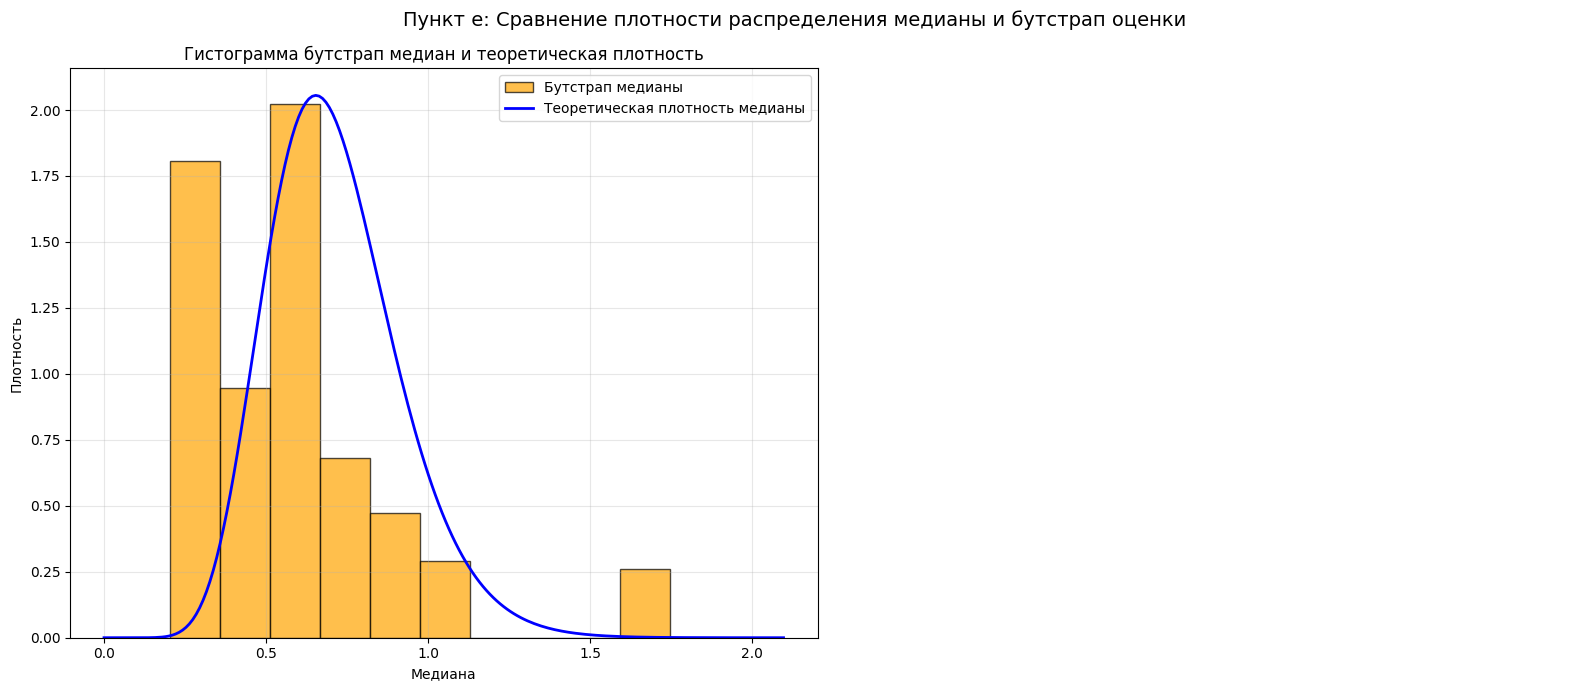


Статистики для пункта e:
Выборочная медиана: 0.5525
Среднее бутстрап медиан: 0.5801


In [44]:

bt_median = bootstrap_median(sample, N)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Пункт e: Сравнение плотности распределения медианы и бутстрап оценки', fontsize=14)

ax1 = axes[0]
ax1.hist(bt_median, bins=int(np.log2(N))+1, density=True, alpha=0.7, color='orange', 
         edgecolor='black', label='Бутстрап медианы')

x_med = np.linspace(0, np.max(bt_median)*1.2, 200)
y_med = [median_density(x) for x in x_med]
ax1.plot(x_med, y_med, 'b-', linewidth=2, label='Теоретическая плотность медианы')
ax1.set_xlabel('Медиана')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма бутстрап медиан и теоретическая плотность')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.axis('off')
plt.tight_layout()
plt.show()


print(f"\nСтатистики для пункта e:")
print(f"Выборочная медиана: {median:.4f}")
print(f"Среднее бутстрап медиан: {np.mean(bt_median):.4f}")

